In [1]:
from helpers import *

# Explore effect of wavelength, beam waist and gradient on the steps

## Compare 1064nm and 532nm

### 1064nm with only gravity (stepsize approx. 1%)

In [2]:
initial_power = 415 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=9.974686590633267um
1818.2333090673535Hz
3.24397429272339 uK


<IPython.core.display.Math object>

[1.16154204e+18 3.71727697e+13 5.63697475e+09 2.02142313e+06
 1.46878474e+03 2.16768602e+00 7.90215471e-03] s
-1.5540993547729812e-29


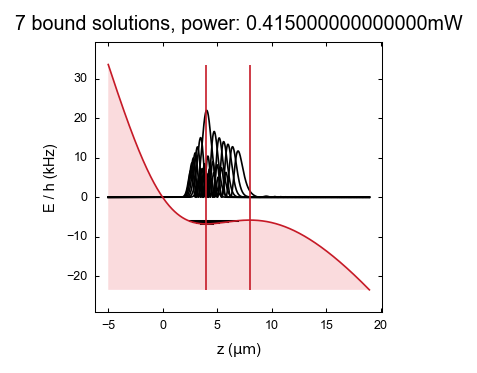

In [3]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,100,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

 24%|██▍       | 36/150 [01:30<01:31,  1.25it/s]<lambdifygenerated-150>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.5969729685721e-39*z/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-151>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.03878918742884e-38*z**2/(pi**5*(z**2/pi**2 + 1.00808875956951e-11)**3) + 2.5969729685721e-39/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2)
c:\Users\peter\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_root_scalar.py:326: RuntimeWarning: Derivative was zero.
  r, sol = methodc(f, x0, args=args, fprime=fprime, fprime2=fprime2, **kwargs)
 25%|██▍       | 37/150 [01:30<01:21,  1.39it/s]<lambdifygenerated-154>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.59030918162928e-39*z/(pi**3*(z**2/pi**2 + 1.00808875956951e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-155>:2: RuntimeWarning: overflow encountered in scalar power
  return -1.03612367

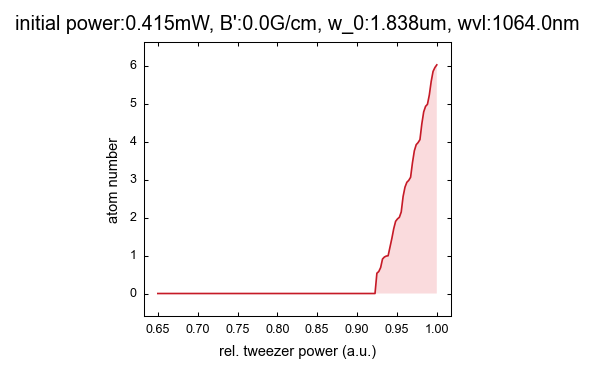

In [4]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,100,-0.15*zr,1.9*zr,power_fac_down=0.65,power_fac_up=1,n_spill_steps=150,n_pot_steps=int(1e3),t_spill=25*si.ms)

### Now with 532nm (stepsize approx. 0.5%)

In [5]:
initial_power = 810 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=180*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 532 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=19.949373181266534um
1254.8559352730656Hz
6.18053278466235 uK


<IPython.core.display.Math object>

[1.11571541e+18 5.84514996e+13 1.38128858e+10 7.29517609e+06
 7.28648012e+03 1.34318358e+01 5.15452745e-02] s
-3.4405640626378434e-29


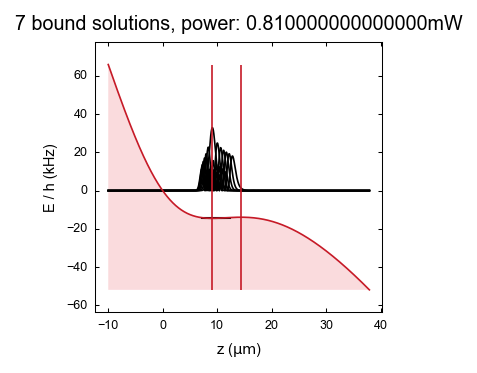

In [6]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,200,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

 39%|███▊      | 58/150 [03:05<01:56,  1.27s/it]<lambdifygenerated-842>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.07780400331272e-38*z/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-843>:2: RuntimeWarning: overflow encountered in scalar power
  return -8.31121601325089e-38*z**2/(pi**5*(z**2/pi**2 + 4.03235503827802e-11)**3) + 2.07780400331272e-38/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2)
 39%|███▉      | 59/150 [03:06<01:50,  1.22s/it]<lambdifygenerated-846>:2: RuntimeWarning: overflow encountered in scalar power
  return 2.07635302286348e-38*z/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2) - 2.67062937174555e-24
<lambdifygenerated-847>:2: RuntimeWarning: overflow encountered in scalar power
  return -8.30541209145393e-38*z**2/(pi**5*(z**2/pi**2 + 4.03235503827802e-11)**3) + 2.07635302286348e-38/(pi**3*(z**2/pi**2 + 4.03235503827802e-11)**2)
 40%|████      | 60/150 [03:07<01:49,  1.22s/it]<lambdifygenerated-850>:2:

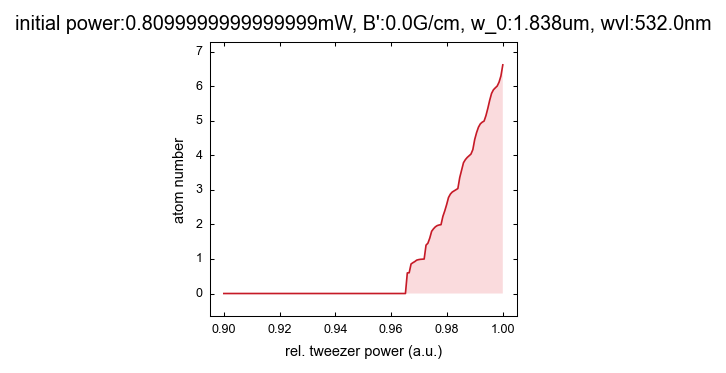

In [7]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,200,-0.15*zr,1.9*zr,power_fac_down=0.9,power_fac_up=1,n_spill_steps=150,n_pot_steps=int(1e3),t_spill=25*si.ms)

We see that the steps are significantly larger for 1064nm.

## Now compare different tweezer waists at 1064nm

### w0 = 1um compared to previous results

When using only gravity for spilling, we need approx. 50um (too low ?), but therefore we don't need to control that power very precisely (steps ~5%).

In [20]:
initial_power = 49 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 0 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer= 1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=2.952624674426497um
3879.36034722613Hz
1.29394674177543 uK


<IPython.core.display.Math object>

[7.04017576e+24 1.55764305e+19 2.03219750e+14 7.77300227e+09
 7.43763814e+05 1.75838686e+02 1.16136010e-01] s
-9.92574367372403e-31


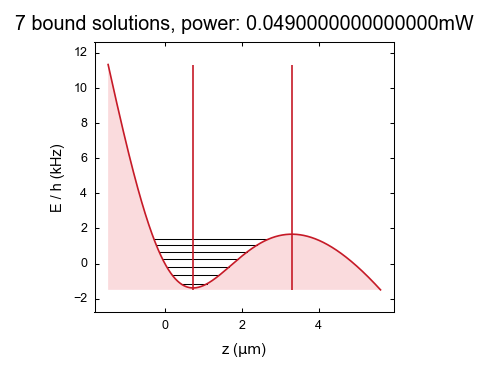

In [24]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,100,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-2,state_mult=1e3)

  0%|          | 0/50 [00:00<?, ?it/s]

 94%|█████████▍| 47/50 [02:13<00:02,  1.44it/s]<lambdifygenerated-1402>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.681550963956e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 2.67062937174555e-24
<lambdifygenerated-1403>:2: RuntimeWarning: overflow encountered in scalar power
  return -2.6726203855824e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 6.681550963956e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
 96%|█████████▌| 48/50 [02:13<00:01,  1.54it/s]<lambdifygenerated-1406>:2: RuntimeWarning: overflow encountered in scalar power
  return 6.61275243797947e-41*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 2.67062937174555e-24
<lambdifygenerated-1407>:2: RuntimeWarning: overflow encountered in scalar power
  return -2.64510097519179e-40*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 6.61275243797947e-41/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
 98%|█████████▊| 49/50 [02:14<00:00,  1.65it/s]<lambdifygenerated-1412>:2: Ru

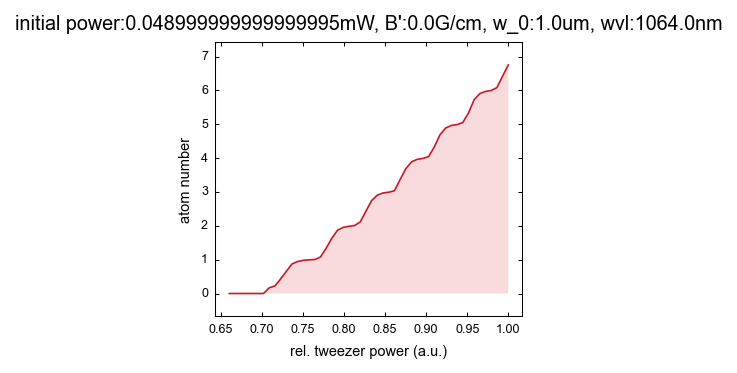

In [10]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,100,-0.15*zr,1.9*zr,power_fac_down=0.66,power_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)

### Now we apply a magentic gradient (ca. 28 G/cm), such that we are at the previous power of 410mW and see that is increases sensibility (steps ~ 1.7%, still a bit better than for 1.8um though):

In [11]:
initial_power = 410 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 28 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer= 1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=2.952624674426497um
11221.580019427654Hz
10.8269013087332 uK


<IPython.core.display.Math object>

[7.57766633e+17 1.46906150e+13 1.41897571e+09 3.42408837e+05
 1.78392153e+02 2.04990425e-01 6.82008767e-04] s
-4.2582259157612584e-29


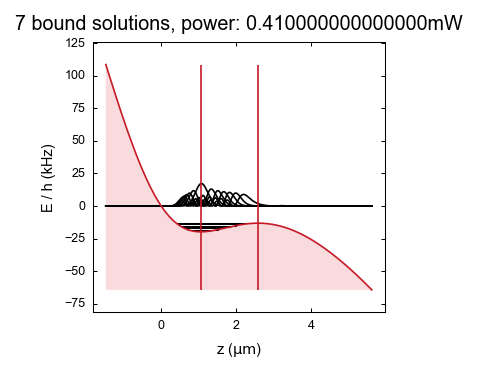

In [12]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,100,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

 39%|███▊      | 58/150 [02:11<00:52,  1.76it/s]<lambdifygenerated-1652>:2: RuntimeWarning: overflow encountered in scalar power
  return 1.71983820933451e-38*z**3/(pi**7*(z**2/pi**2 + 8.83317315846006e-13)**4) - 8.59919104667254e-39*z/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3)
<lambdifygenerated-1650>:2: RuntimeWarning: overflow encountered in scalar power
  return 7.16599253889378e-40*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 2.84560869934509e-23
<lambdifygenerated-1651>:2: RuntimeWarning: overflow encountered in scalar power
  return -2.86639701555751e-39*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 7.16599253889378e-40/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
<lambdifygenerated-1651>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -2.86639701555751e-39*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 7.16599253889378e-40/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
<lambdifygenerated-1652>:2: RuntimeWarning: invalid value en

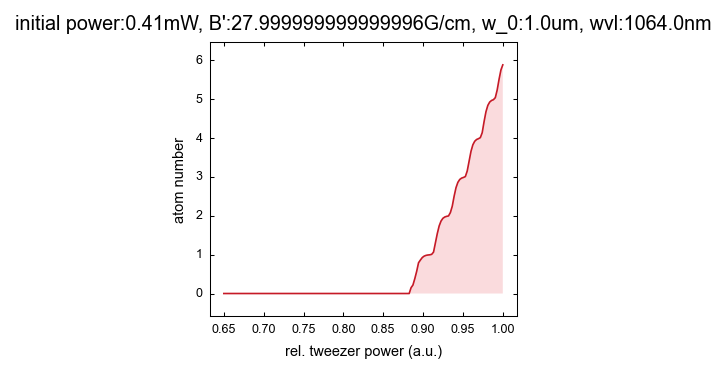

In [13]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,100,-0.15*zr,1.9*zr,power_fac_down=0.65,power_fac_up=1,n_spill_steps=150,n_pot_steps=int(1e3),t_spill=25*si.ms)

### Further increasing magnetic gradient in order to use higher powers leads to worse sensibility:

In [14]:
initial_power = 760 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= 56 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer= 1 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=2.952624674426497um
15278.08347231161Hz
20.0693780357006 uK


<IPython.core.display.Math object>

[2.76055344e+18 6.44606048e+13 7.21740115e+09 1.93028260e+06
 1.05227343e+03 1.15766569e+00 3.01295394e-03] s
-4.8402461098798324e-29


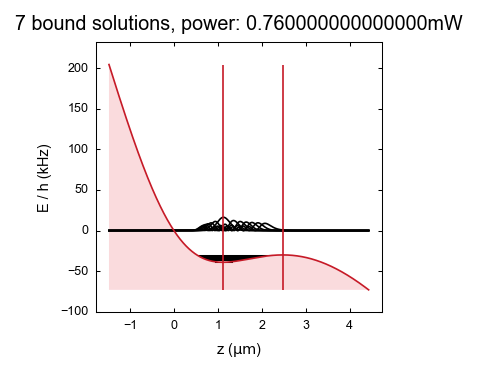

In [15]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,100,-0.5*zr,1.5*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

 32%|███▏      | 48/150 [01:54<01:05,  1.56it/s]<lambdifygenerated-2214>:2: RuntimeWarning: overflow encountered in scalar power
  return 1.3644543035756e-39*z/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2) - 5.42415446151562e-23
<lambdifygenerated-2215>:2: RuntimeWarning: overflow encountered in scalar power
  return -5.45781721430239e-39*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 1.3644543035756e-39/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
<lambdifygenerated-2216>:2: RuntimeWarning: overflow encountered in scalar power
  return 3.27469032858144e-38*z**3/(pi**7*(z**2/pi**2 + 8.83317315846006e-13)**4) - 1.63734516429072e-38*z/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3)
<lambdifygenerated-2215>:2: RuntimeWarning: invalid value encountered in scalar divide
  return -5.45781721430239e-39*z**2/(pi**5*(z**2/pi**2 + 8.83317315846006e-13)**3) + 1.3644543035756e-39/(pi**3*(z**2/pi**2 + 8.83317315846006e-13)**2)
<lambdifygenerated-2216>:2: RuntimeWarning: invalid value encou

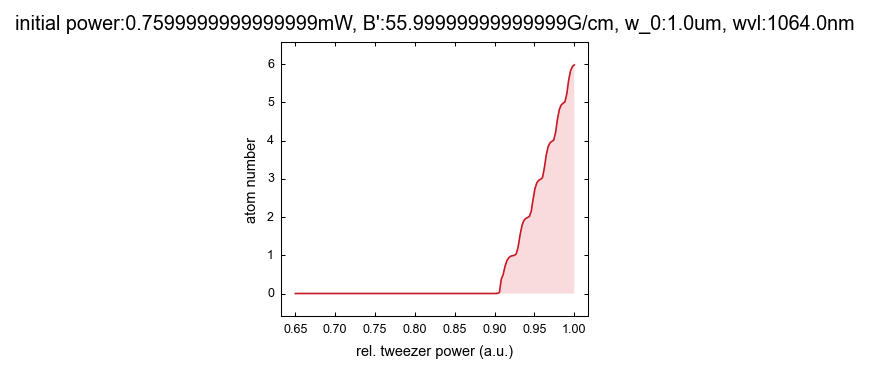

In [16]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,100,-0.15*zr,1.5*zr,power_fac_down=0.65,power_fac_up=1,n_spill_steps=150,n_pot_steps=int(1e3),t_spill=25*si.ms)

## What happens when we use w0=1.8um, but cancel gravity partly with a magnetic gradient?

In [17]:
initial_power = 277 * si.uW 

trap: PancakeTrap = PancakeTrap(
    power=0,  # Set pancake laser power to 0, no 2D trap
    grad_z= -1 * si.G / si.cm,
    grad_r=0,
    power_tweezer=initial_power,
    waist_tweezer=1.838 * si.um,
    a=184.4*(4 * np.pi * const.epsilon_0 * const.value("Bohr radius")**3)/(2 * const.epsilon_0 * const.c),

    wvl = 1064 * si.nm,
)

zr = float(trap.subs(trap.get_tweezer_rayleigh()))
print(f"zr={zr*1e6}um")

print(f"{float(trap.subs(trap.get_omega_ax_tweezer()))}Hz")
print(f"{trap.subs(trap.a *2*trap.power_tweezer/(np.pi*trap.waist_tweezer**2)/ const.k) /si.uK} uK")

aspect_ratio = trap.get_omega_r_tweezer() / trap.get_omega_ax_tweezer()
_aspect_ratio_latex = sp.latex(trap.omega_r_tweezer / trap.omega_ax_tweezer)
display(Math(f"{_aspect_ratio_latex} \\approx {trap.subs(aspect_ratio).evalf():.2f}"))

zr=9.974686590633267um
1485.475337041628Hz
2.16525513032381 uK


<IPython.core.display.Math object>

[1.47738263e+19 3.80925983e+14 4.68117854e+10 1.36564479e+07
 8.06995283e+03 9.56841789e+00 2.69735156e-02] s
-9.750679376032344e-30


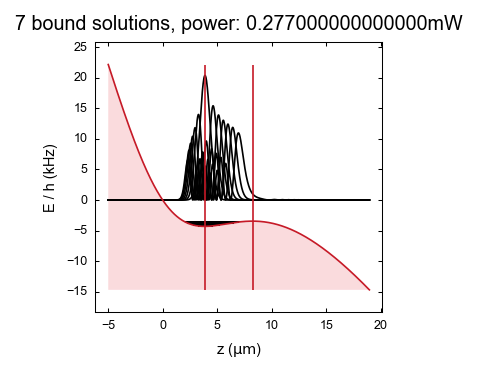

In [18]:
trap[trap.power_tweezer] = 1* initial_power
plot_solutions(trap,100,-0.5*zr,1.9*zr,n_pot_steps=1000,display_plot=-1,state_mult=1e3)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [02:02<00:00,  2.45s/it]


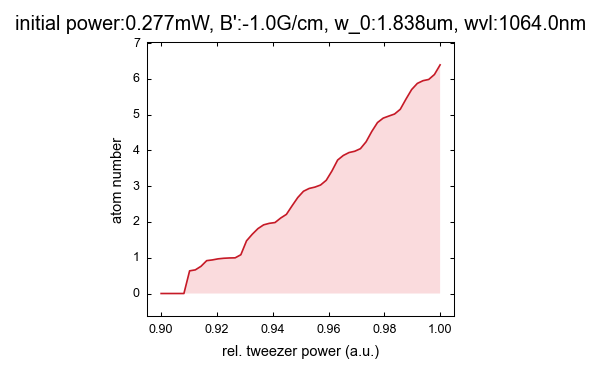

In [19]:
trap[trap.power_tweezer] = initial_power
plot_occupation(trap,100,-0.15*zr,1.9*zr,power_fac_down=0.9,power_fac_up=1,n_spill_steps=50,n_pot_steps=int(1e3),t_spill=25*si.ms)